# The Basic Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
import sympy as sm
from IPython.display import display, Math
import os
import math

In [2]:
output_fold = os.getcwd() + r'\output'

In [13]:
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 9  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = 0.12  # 12% Larval mortality rate
uM =  0.011  # Male mortality rate
uF = 0.008  # Female mortality rate
gamma = 0.1
delta = 0.1
lamda = 4 

######
# Calculations based on the parameters
etha0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######

# Time parameters for system integration
t_0 = 0             # Initial time
t_fin = 700         # Final time
pas_t = 0.001       # Time step
t = np.arange(t_0, t_fin, pas_t)  # Time period

print('N0 =', etha0)  # Print the value of etha0
print('muM=',uM, 'muF=',uF, 'we notice that males die more quickly' )
# this is for releasing both females and males
etha= ((1-m) * vL * vF * b) / (uF * (uL + vL))
print((K*(1-(1/etha))))

N0 = 147.87066246056781
muM= 0.011 muF= 0.008 we notice that males die more quickly
993.2373333333333


# Essantial model

In [4]:
#define the ODE system
#gamma=delta=0
def model_ds_b(X,t):
    L = X[0] #larva
    M = X[1] #Males 
    F = X[2] #females mated with wild males
    #ODE system general case
    L_dot = b*(1-(L/K))*min((lamda*M/F),1)*vF*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    F_dot = (1-m)*vL*L -uF*F #(uF+delta)*F
        #vecteurs
    return np.array([L_dot,M_dot,F_dot])

In [5]:
def dynamic_ds_b(X0, name="dynamic_base_first", graph=True):
    # Solving the system
    X = integrate.odeint(model_ds_b, X0, t, hmax=pas_t)
    
    # Case where no release occurs
    L, M, F = X.T
        
    if graph == True:
            # Create a new figure
        fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
        plt.plot(t, L, 'g--')  # Larva
        
        plt.plot(t, M, 'b-.')  # Male
        plt.plot(t, F, 'r-')   # Fertilized
            
            # Curve labels
        plt.plot(0, 'g--', label='Larva')
        
        plt.plot(0, 'b-.', label='Males')
        plt.plot(0, 'r-', label='Fertilized')
            
            # Figure title
        fig.suptitle("Population's Dynamics 3-compartement model")
        plt.xlabel('time')
        plt.grid()
        plt.legend(loc='best')
            
    # Export the graph
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
         # Create a new figure
        fig = plt.figure(figsize=(8, 3))
            
        # Plot the population dynamics over time
        plt.plot(M, F, 'b-.')  # Male vs Fertilized
        # Plot the line x=y
        plt.plot(t, t, 'k-', label='M=F')
            
        # Curve labels
       # plt.plot(0, 0, 'b-.', label='Male')
            
        # Figure title and axis labels
        fig.suptitle("Males vs Females numbers")
        plt.xlabel('Males')
        plt.ylabel('Females')
        plt.grid()
        plt.legend(loc='best')
            
        # Export the graph
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)


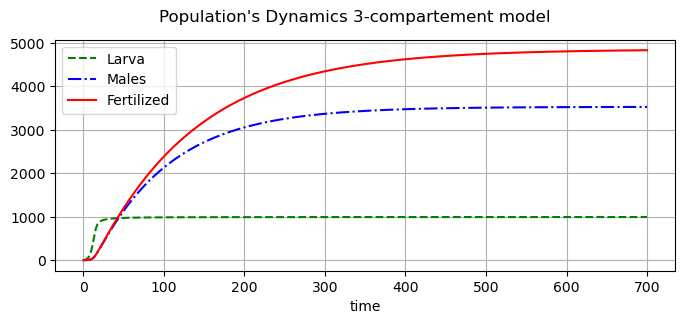

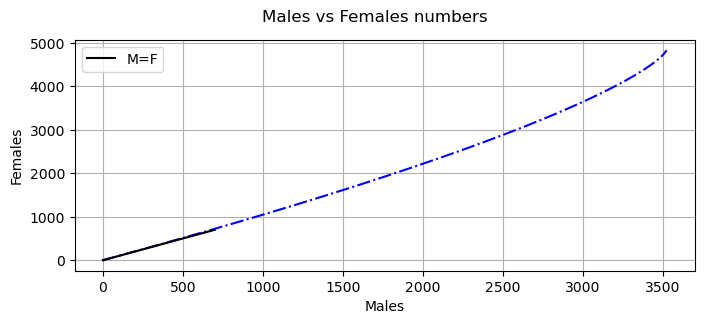

In [14]:
#initial conditions without release
X0_base = [0,1,1]
#system dynamics
Mb = dynamic_ds_b(X0_base,name="dynamics without steriles basic model, 2 set paramters,")

# 1) male abundancy

In [57]:
def dynamic_ds(X0, name="dynamic_base", graph=True):
    # Solving the system
    X = integrate.odeint(model_ds_b, X0, t, hmax=pas_t)
    
    # Case where no release occurs
    L, M, F = X.T
        
    if graph == True:
            # Create a new figure
        fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
        plt.plot(t, L, 'g--')  # Larva
        
        plt.plot(t, M, 'b-.')  # Male
        plt.plot(t, F, 'r-')   # Fertilized
            
            # Curve labels
        plt.plot(0, 'g--', label='Larva')
        
        plt.plot(0, 'b-.', label='Male')
        plt.plot(0, 'r-', label='Fertilized')
            
            # Figure title
        fig.suptitle("Population's Dynamics basic model without constraints and males abundancy, 2 set")
        plt.xlabel('time')
        plt.grid()
        plt.legend(loc='best')
            
    # Export the graph
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
         # Create a new figure
        fig = plt.figure(figsize=(8, 3))
            
        # Plot the population dynamics over time
        plt.plot(M, F, 'b-.')  # Male vs Fertilized
        # Plot the line x=y
        plt.plot(M, M, 'k-', label='M=F')
            
        # Curve labels
       # plt.plot(0, 0, 'b-.', label='Male')
            
        # Figure title and axis labels
        fig.suptitle("Males vs Females numbers")
        plt.xlabel('Males')
        plt.ylabel('Females')
        plt.grid()
        plt.legend(loc='best')
            
        # Export the graph
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
        

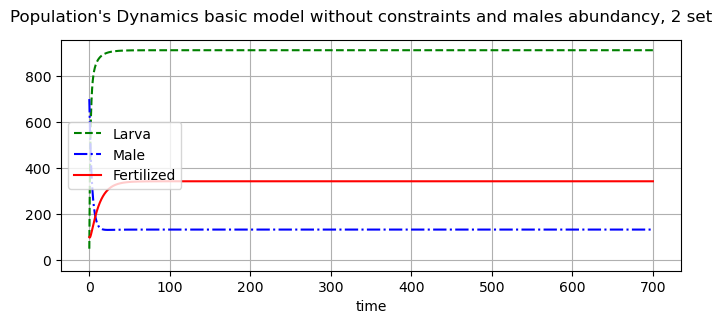

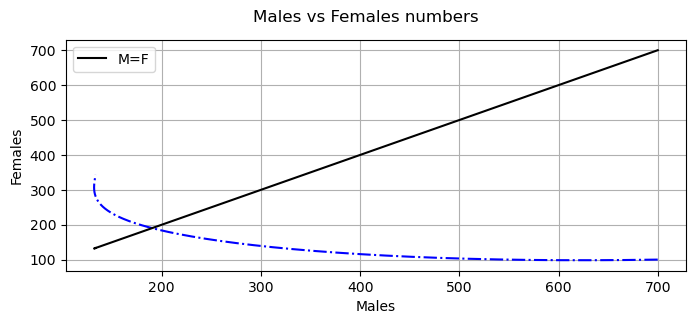

In [58]:
#initial conditions without release
#males abundancy
X0_base = [50,700,100]
#system dynamics
Mb = dynamic_ds(X0_base,name="dynamics without steriles male abundance and basic model, 2 set")

# Males scarcity

In [59]:
def dynamic_dsb(X0, name="dynamic_base", graph=True):
    # Solving the system
    X = integrate.odeint(model_ds_b, X0, t, hmax=pas_t)
    
    # Case where no release occurs
    L, M, F = X.T
        
    if graph == True:
            # Create a new figure
        fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
        plt.plot(t, L, 'g--')  # Larva
        
        plt.plot(t, M, 'b-.')  # Male
        plt.plot(t, F, 'r-')   # Fertilized
            
            # Curve labels
        plt.plot(0, 'g--', label='Larva')
        
        plt.plot(0, 'b-.', label='Male')
        plt.plot(0, 'r-', label='Female')
            
            # Figure title
        fig.suptitle("basic model male scarcity, 2 set of paramatres")
        plt.xlabel('time')
        plt.grid()
        plt.legend(loc='best')
            
    # Export the graph
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
         # Create a new figure
        fig = plt.figure(figsize=(8, 3))
            
        # Plot the population dynamics over time
        plt.plot(M, F, 'b-.')  # Male vs Fertilized
        # Plot the line x=y
        plt.plot(M, M, 'k-', label='M=F')
            
        # Curve labels
       # plt.plot(0, 0, 'b-.', label='Male')
            
        # Figure title and axis labels
        fig.suptitle("Males vs Females numbers")
        plt.xlabel('Males')
        plt.ylabel('Females')
        plt.grid()
        plt.legend(loc='best')
            
        # Export the graph
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)

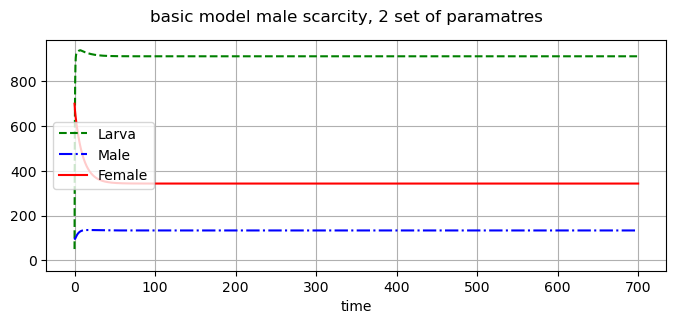

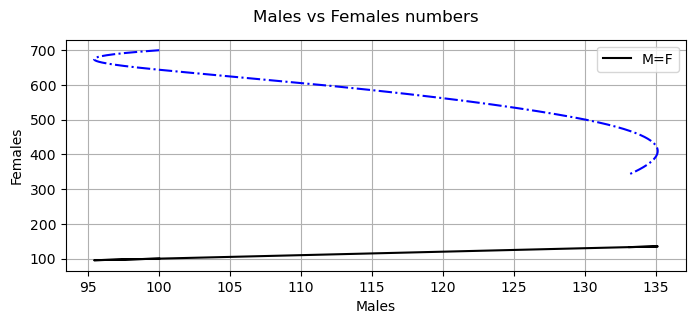

In [60]:
#initial conditions without release
#males scarcity
X0_base = [50,100,700]
#system dynamics
Mb = dynamic_dsb(X0_base,name="dynamics basic model male scarcity 2 set") # minimum here to see the thing clearly

# Releasing Males and females

In [67]:
#define the ODE system
#gamma=delta=0
def model_rels(X,t,Ms,Fs):
    L = X[0] #larva
    M = X[1] #Males 
    F = X[2] #females mated with wild males
    #ODE system general case
    if Ms==0 and Fs!=0:
        L_dot = b*(1-(L/K))*vF*(F/(F+Fs))*F - (vL+uL)*L
    elif Ms!=0 and Fs==0:
        L_dot = b*(1-(L/K))*vF*(M/(M+Ms))*F - (vL+uL)*L
    elif  Ms==0 and Fs==0:
        L_dot = b*(1-(L/K))*vF*min(lamda*M/F,1)*F - (vL+uL)*L
    else:
        L_dot = b*(1-(L/K))*vF*(M/(M+Ms))*(F/(F+Fs))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    F_dot = (1-m)*vL*L -uF*F #(uF+delta)*F
        #vecteurs
    return np.array([L_dot,M_dot,F_dot])

In [68]:
def dynamic_rels(X0, Ms, Fs, name="dynamic_base_releases", graph=True):
    # Solving the system
    X = integrate.odeint(model_rels, X0, t, args=(Ms,Fs), hmax=pas_t)
    
    # Case where no release occurs
    if Ms == 0 and Fs==0:
        L, M, F = X.T
        
        if graph == True:
            # Create a new figure
            fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
            plt.plot(t, L, 'g--')  # Larva
            plt.plot(t, M, 'y-.')  # Male
            plt.plot(t, F, 'r-')   # Fertilized
            
            # Curve labels
            plt.plot(0, 'g--', label='Larva')
            plt.plot(0, 'y-.', label='Male')
            plt.plot(0, 'r-', label='Female')
            
            # Figure title
            fig.suptitle("Population's Dynamics without SIT")
            plt.xlabel('time')
            plt.grid()
            plt.legend(loc='best')
            
            # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
            
    if Ms!=0 and Fs==0:
        L, M, F = X.T
        
        if graph == True:
            # Create a new figure
            fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
            plt.plot(t, L, 'g--')  # Larva
            plt.plot(t, M, 'y-.')  # Male
            plt.plot(t, F, 'r-')   # Female
            
            # Curve labels
            plt.plot(0, 'g--', label='Larva')
            plt.plot(0, 'y-.', label='Male')
            plt.plot(0, 'r-', label='Female')
            
            # Figure title
            fig.suptitle("Population's Dynamics with Sterile males Release")
            plt.xlabel('time')
            plt.grid()
            plt.legend(loc='best')
            
            # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
    if Ms!=0 and Fs!=0:
        L, M, F = X.T
        
        if graph == True:
            # Create a new figure
            fig = plt.figure(figsize=(8, 3))
            
            # Plot the population dynamics over time
            plt.plot(t, L, 'g--')  # Larva
            plt.plot(t, M, 'b-.')  # Male
            plt.plot(t, F, 'r-')   # Fertilized
            
            # Curve labels
            plt.plot(0, 'g--', label='Larva')
            plt.plot(0, 'b-.', label='Male')
            plt.plot(0, 'r-', label='Female')
            
            # Figure title
            fig.suptitle("Population's Dynamics with Sterile males and females Release")
            plt.xlabel('time')
            plt.grid()
            plt.legend(loc='best')
            
            # Export the graph
            plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
        

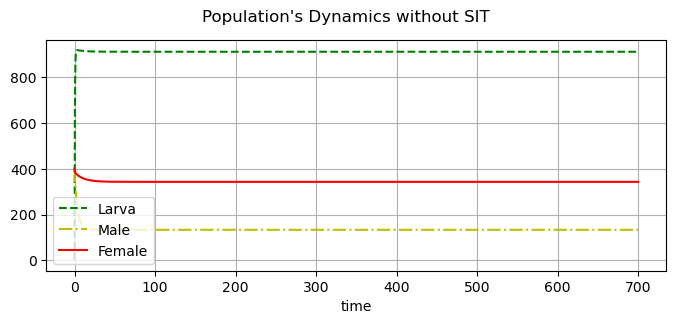

In [69]:
#initial conditions without release
X0_base = [0,400,400]
#system dynamics
Mb = dynamic_rels(X0_base, Ms=0, Fs=0, name="dynamics with sterile males and females")

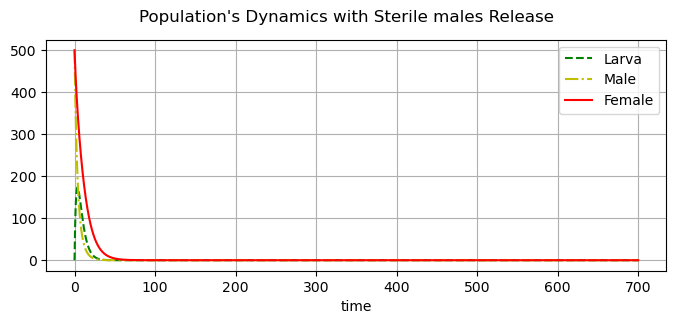

In [71]:
#initial conditions without release
X0_base = [0,400,400]
#system dynamics
Mb = dynamic_rels(X0_base, Ms=10000, Fs=0, name="dynamics with sterile males and females")

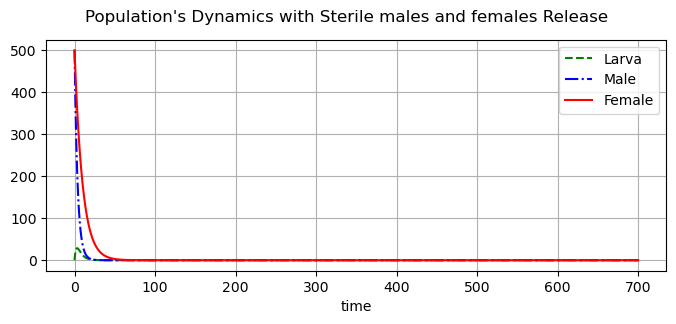

In [72]:
#initial conditions without release
X0_base = [0,400,400]
#system dynamics
Mb = dynamic_rels(X0_base, Ms=5000, Fs=5000, name="dynamics with sterile males and females")

# Equilbrium points and its stability studies

**1) Males releses**

In [31]:
#Les points d'intersection des droites MS et de la parabole
def qintersections(t,curve1, curve2,positive=True,limit=True):
    intersections = []
    prev_dif = 0
    t0, prev_c1, prev_c2 = None, None, None
    for t1, c1, c2 in zip(t, curve1, curve2):
        new_dif = c2 - c1
        if np.abs(new_dif) < 1e-12: # a trouvé un zéro exact, c'est très improbable
            intersections.append((t1, c1))
        elif new_dif * prev_dif < 0:  # la fonction a changé de signe entre ce point et le précédent
            # faire une interpolation linéaire pour trouver le t entre t0 et t1 où les courbes seraient égales
            # Voici l'intersection entre la ligne [(t0, prev_c1), (t1, c1)] et la ligne [(t0, prev_c2), (t1, c2)].
            # à cause du changement de signe, nous savons qu'il y a une intersection entre t0 et t1.
            denom = prev_dif - new_dif
            intersections.append(((-new_dif*t0  + prev_dif*t1) / denom, (c1*prev_c2 - c2*prev_c1) / denom))
        t0, prev_c1, prev_c2, prev_dif = t1, c1, c2, new_dif
    if len(intersections) == 0:
        res = r"\textit{No intersections between}"
        form = r"\textit{$y=M_S$ and $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$}"
        display(Math(res + form))
        print("-------------------------------------------")
    if len(intersections) == 1:
        res = r"\textit{One intersection point between}"
        form = r"\textit{$y=M_S$ and $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$} \\"
        pts = r"\textit{at the equilibrium point $L_0$ with coordinates }" + str(intersections)
        display(Math(res + form + pts))
        print("-------------------------------------------")
    if len(intersections) == 2:
        res = r"\textit{Two intersection points between}"
        form = r"\textit{$y=M_S$ and $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$} \\"
        pts = r"\textit{at the equilibrium points $L_1$ and $L_2$ with respective coordinates } \\"
        cod = str(intersections[0])+ " and " +str(intersections[1])
        display(Math(res+form+pts+cod))
        print("-------------------------------------------")
    return intersections

In [32]:
eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))
L_median = (K/2) * (1 - (1 / eta0))  # Number of Larvae at the top of the parabola
L_max = K * (1 - (1 / eta0))  # Maximum number of larvae on the parabola MS
L0 = 0  # Minimum number of larvae on the parabola MS
Ln = np.array(np.arange(L0, L_max, 0.1))  # Discretization of L values
Ms = [-eta0 * gamma * (l**2) / K + gamma * (eta0 - 1) * l for l in Ln]  # Values of MS along the parabola
Ms_col = max(Ms)
Ms_sup = Ms_col * 1.1  # MS with non-existence of positive equilibria
Ms_inf = Ms_col * 0.9  # MS at positive equilibria

# Different equilibria
# Case 1: Col point (y = Max_Ms)
y_col = [Ms_col] * len(Ln)  # y = MS at the top of the parabola
print("-------------------------------------------")
display(Math(r"\textit {At the top of the parabola i.e $M_S = M_S(L)$}"))
I_col = qintersections(Ln, Ms, y_col)  # Intersection points

# Case 2: Non-existence of positive equilibria (Ms > Max_Ms)
y_sup = [Ms_sup] * len(Ln)  # y = MS above the top of the parabola
display(Math(r"\textit {For $M_S > M_S(L)$}"))
I_sup = qintersections(Ln, Ms, y_sup)  # Intersection points

# Case 3: Existence of positive equilibria (Ms < Max_Ms)
y_inf = [Ms_inf] * len(Ln)  # y = MS below the top of the parabola
display(Math(r"\textit {For $M_S < M_S(L)$}"))
I_inf = qintersections(Ln, Ms, y_inf)  # Intersection points

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


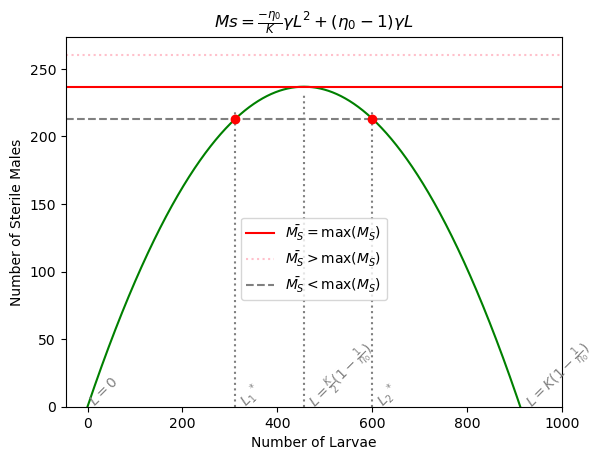

In [33]:
# Number of Larvae as a function of the number of sterile males
plt.plot(Ln, Ms, color='green')

# Plot horizontal lines passing through MS
plt.axhline(Ms_col, label=r'$\bar{M_S} = \max(M_S)$', color="red", linestyle='solid')  # vertex of the parabola
plt.axhline(Ms_sup, label=r'$\bar{M_S} > \max(M_S)$', color="pink", linestyle=':')  # above the vertex of the parabola
plt.axhline(Ms_inf, label=r'$\bar{M_S} < \max(M_S)$', color="grey", linestyle='--')  # below the vertex of the parabola

# Intersection points
# Vertex of the parabola
plt.axvline(L_median, color='gray', linestyle='dotted', ymax=0.85)
# First intersection point of case 2: y < MS_max
plt.axvline(np.flip(I_inf[0][0]), color='gray', linestyle='dotted', ymax=0.80)
# Second intersection point of case 2: y < MS_max
plt.axvline(np.flip(I_inf[1][0]), color='gray', linestyle='dotted', ymax=0.80)

plt.plot(*zip(*I_inf), 'ro')  # Plot intersection points

# Annotations on points and curves
plt.annotate(r'$ L = \frac{K}{2}(1-\frac{1}{\eta_0})$', (L_median, 1), rotation=45, color='grey')
plt.annotate(r'$ L = 0$', (-0.5, 1), rotation=45, color='grey')
plt.annotate(r'$ L = K(1-\frac{1}{\eta_0})$', (L_max, 1), rotation=45, color='grey')
plt.annotate(r'$ {L_1}^*$', (I_inf[0][0], 1), rotation=45, color='grey')
plt.annotate(r'$ {L_2}^*$', (I_inf[1][0], 1), rotation=45, color='grey')

# Graph titles
plt.legend(bbox_to_anchor=(.5, .4), loc='center')
plt.ylabel('Number of Sterile Males')
plt.xlabel('Number of Larvae')
plt.title(r'$Ms = \frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$')

# Axis limits
plt.ylim(bottom=-0.1)
plt.xlim(right=K)

# Export the graph
name = output_fold + r'\parabola'
plt.savefig(name + '.png', dpi=300)
# plt.savefig(name+'.pdf', dpi=300)

plt.show()


# Bifurcation

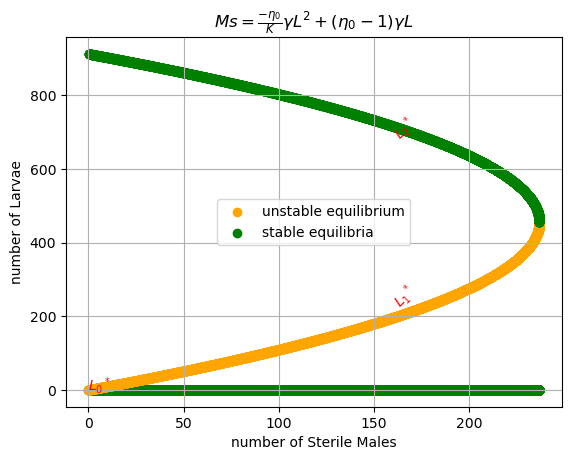

In [40]:
L_median = (K/2)*(1-(1/etha0))
L_max = K*(1-(1/etha0))
L0 = 0

# Case 1: Null equilibrium (0,0,0,0) always stable
Ln3 = np.array(np.arange(L0, L_max, 0.1))
Ln_3=np.zeros_like(Ln3)
Ms3 = [-etha0*gamma*(l**2)/K + gamma*(etha0-1)*l for l in Ln3]
plt.scatter(Ms3, Ln_3, color='green')

# Case 2: Unstable positive equilibrium
Ln1 = np.array(np.arange(L0, L_median, 0.1))
Ms1 = [-etha0*gamma*(l**2)/K + gamma*(etha0-1)*l for l in Ln1]
plt.scatter(Ms1, Ln1, color='orange', label=r'unstable equilibrium')

# Case 3: Stable positive equilibrium
Ln2 = np.array(np.arange(L_median, L_max, 0.1))
Ms2 = [-etha0*gamma*(l**2)/K + gamma*(etha0-1)*l for l in Ln2]
plt.scatter(Ms2, Ln2, color='g', label=r'stable equilibria')

# Annotation on the graph
plt.annotate(r'$ {L_1}^*$', (np.mean(Ms1), np.mean(Ln1)), rotation=45, color='red')
plt.annotate(r'$ {L_2}^*$', (np.mean(Ms2), np.mean(Ln2)), rotation=45, color='red')
plt.annotate(r'$ {L_0}^*$', (0, 0), color='red')

# Titles on the graph
plt.xlabel('number of Sterile Males')
plt.ylabel('number of Larvae')
plt.title(r'$Ms = \frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$')
plt.legend(bbox_to_anchor=(.5, .5), loc='center')

# Export the graph
plt.savefig(output_fold + r'\parabole_ms.png', dpi=300)
plt.grid()
plt.show()


# 2) releasing both males and females


2-1) equilbrium points

intersection points: [ 609.72380623  437.47833839 -135.0424012 ]
where we have a one positive intersection point: [529.16127153  78.94522409]


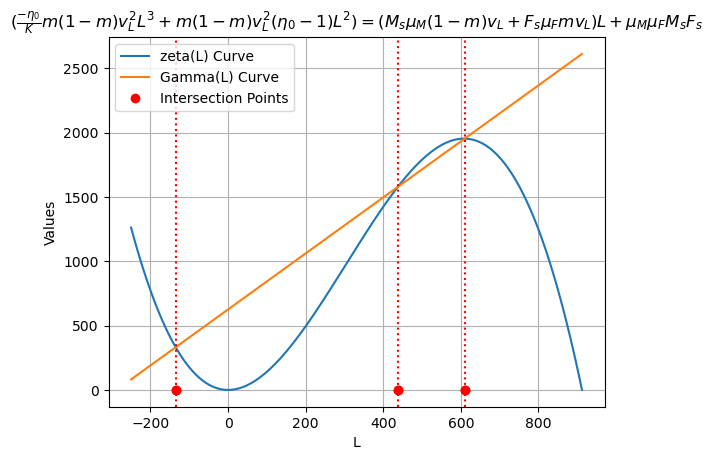

In [7]:
# Calculations based on the parameters
eta0 = ((1 - m) * vL * vF * b) / (uF * (uL + vL))  # Number of baseline descendants

Fs = 150
Ms = 150
L0 = 0
L_max = K * (1 - (1 / eta0))

Ln = np.array(np.arange(-250, L_max, 0.1))  # Discretization of L values
right = np.array([(-(eta0 / K) * m * (1 - m) * vL ** 2 * L ** 3 + m * (1 - m) * vL ** 2 * (eta0 - 1) * L ** 2) for L in Ln])  # Values of MS along the parabola
left = np.array([(Ms * uM * (1 - m) * vL + Fs * uF * m * vL) * L + uM * Ms * Fs * uF for L in Ln])

term1 = -(eta0 / K) * m * (1 - m) * vL ** 2
term2 = m * (1 - m) * vL ** 2 * (eta0 - 1)
term3 = -(Ms * uM * (1 - m) * vL + Fs * uF * m * vL)
term4 = -Ms * Fs * uM * uF
roots = np.roots([term1, term2, term3, term4])
print('intersection points:', roots)

term11 = -3*(eta0 / K) * m * (1 - m) * vL ** 2
term22 = 2*m * (1 - m) * vL ** 2 * (eta0 - 1)
term33 = -(Ms * uM * (1 - m) * vL + Fs * uF * m * vL)
rootsprime = np.roots([term11, term22, term33])
print('where we have a one positive intersection point:', rootsprime)

# Create the plot
plt.plot(Ln, right, label='zeta(L) Curve')
plt.plot(Ln, left, label='Gamma(L) Curve')

# Highlight intersection points
plt.plot(roots, [0] * len(roots), 'ro', label='Intersection Points')
# Highlight intersection points on the x-axis
for root in roots:
    plt.axvline(x=root, color='red', linestyle='dotted')
    plt.plot(root, 0, 'ro')

# Add labels and title to the plot
plt.xlabel('L')
plt.ylabel('Values')
plt.title(r'$(\frac{-\eta_0}{K}m(1 - m)v_L^2L^3 + m(1 - m)v_L^2 (\eta_0 - 1)L^2) = (M_s\mu_M(1 - m)v_L + F_s\mu_Fmv_L)L + \mu_M\mu_FM_sF_s$')
plt.grid(True)

# Add a legend
plt.legend()
name="intersection with sterile males and females"
plt.savefig(output_fold+'\\'+name+'.png', dpi=300)

# Display the plot
plt.show()

[ 609.72380623  437.47833839 -135.0424012 ]


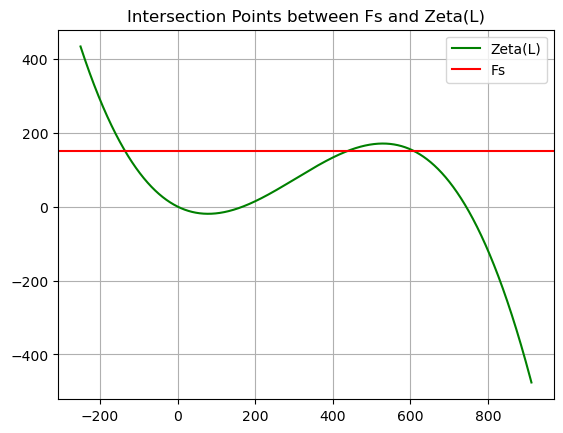

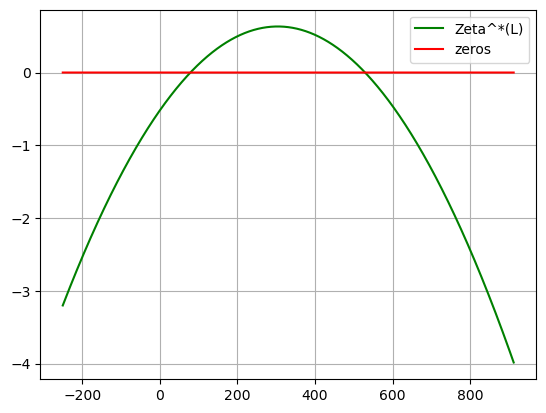

In [9]:
######
# Calculations based on the parameters
eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######

# Generate L values
#L_values = np.linspace(0, 100, 1000)
Fs=150
Ms=150
L0=0
L_max=K*(1-(1/eta0))

Ln = np.array(np.arange(-250, L_max, 0.1))  # Discretization of L values
Females = np.array([(-(eta0 / K) * m * (1 - m) * vL**2 * L**3 + m * (1 - m) * vL**2 * (eta0 - 1) * L**2 - (Ms * uM * (1 - m) * vL + Fs * uF * m * vL) * L)/(uM*Ms*uF) for L in Ln])  # Values of MS along the parabola
Females_prime=np.array([(-(eta0 / K) * m * (1 - m) * vL**2 * (L**2) * 3 + m * (1 - m) * vL**2 * (eta0 - 1) * L*2 - (Ms * uM * (1 - m) * vL + Fs * uF * m * vL) )/(uM*Ms*uF) for L in Ln])

term1=-(eta0 / K) * m * (1 - m) * vL**2 
term2=m * (1 - m) * vL**2 * (eta0 - 1)
term3= - (Ms * uM * (1 - m) * vL + Fs * uF * m * vL)
term4=-Ms * Fs * uM * uF 
roots = np.roots([term1, term2, term3, term4])
print(roots)
# Find intersection indices
intersection_indices = np.where(Females == Fs)[0]

# Extract corresponding L values
intersection_L_values = Ln[intersection_indices]
Ln_another = np.zeros_like(Ln)
# Plot the curves
plt.plot(Ln, Females, color='green', label='Zeta(L)')
plt.axhline(Fs, color='red', label='Fs')
plt.grid(True)
plt.legend()
plt.title("Intersection Points between Fs and Zeta(L)")
plt.show()
# Plot the deriviative of the curve zeta1

plt.plot(Ln, Females_prime, color='green', label='Zeta^*(L)')
plt.plot(Ln, Ln_another, color='red', label='zeros')
plt.grid(True)
plt.legend()
# Highlight the intersection points
#plt.scatter(intersection_L_values, np.full_like(intersection_L_values, Fs), color='blue', marker='*')

# Add a title


plt.show()



# Bifurcation

In [21]:
######
# Calculations based on the parameters
eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######
p=0.5
L0=0
L_max=K*(1-(1/eta0))
N=np.arange(L0, 400, 5)

for n in N:
  # Discretization of L values
    
    term1=-(eta0 / K) * m * (1 - m) * vL**2 
    term2=m * (1 - m) * vL**2 * (eta0 - 1)
    term3=  -p * n * uM * (1 - m) * vL - (1 - p) * n * uF * m * vL
    term4= -p * n * uM*(1 - p) * n * uF
    
    roots = np.roots([term1, term2, term3, term4])
    #print(roots)

# plotting positive ones

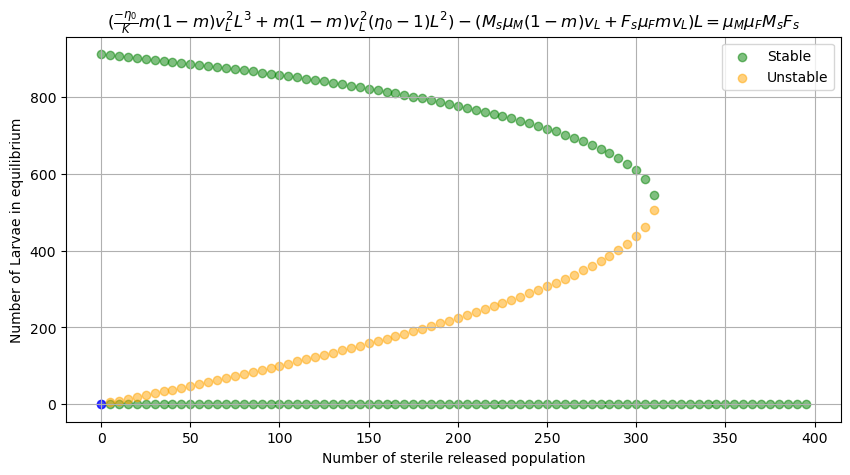

In [22]:

positive_roots = []
for n in N:
    # Discretization of L values
    term1 = -(eta0 / K) * m * (1 - m) * vL ** 2
    term2 = m * (1 - m) * vL ** 2 * (eta0 - 1)
    term3 = -p * n * uM * (1 - m) * vL - (1 - p) * n * uF * m * vL
    term4 = -p * n * uM * (1 - p) * n * uF

    roots = np.roots([term1, term2, term3, term4])
    real_positive_roots = [root.real if root.real >= 0 else 0 for root in roots if np.isreal(root)]
    positive_roots.append(real_positive_roots)

plt.figure(figsize=(10, 5))
for i, root_list in enumerate(positive_roots):
    x = [N[i]] * len(root_list)
    y = root_list

    # Check stability condition and set color accordingly
    stability_condition = (-3 * m * (1 - m) * vL ** 2 * eta0 / K * np.array(y) ** 2 +
                           2 * (eta0 - 1) * m * (1 - m) * vL ** 2 * np.array(y) -
                           p * N[i] * uM * (1 - m) * vL -
                           (1 - p) * N[i] * uF * m * vL)
    stable_indices = np.where(stability_condition < 0)[0]
    unstable_indices = np.where(stability_condition > 0)[0]
    unstable_indices1 = np.where(stability_condition == 0)[0]
    #print(stable_indices,unstable_indices)
    plt.scatter(np.array(x)[stable_indices], np.array(y)[stable_indices], color='green', alpha=0.5)
    plt.scatter(np.array(x)[unstable_indices], np.array(y)[unstable_indices], color='orange', alpha=0.5)
    plt.scatter(np.array(x)[unstable_indices1], np.array(y)[unstable_indices1], color='blue', alpha=0.5)
    # Plot formatting
plt.xlabel('Number of sterile released population')
plt.ylabel('Number of Larvae in equilibrium')
plt.title(r'$(\frac{-\eta_0}{K}m(1 - m)v_L^2L^3 + m(1 - m)v_L^2 (\eta_0 - 1)L^2)-(M_s\mu_M(1 - m)v_L + F_s\mu_Fmv_L)L = \mu_M\mu_FM_sF_s$')
plt.legend(['Stable', 'Unstable'])
plt.grid(True)

# Export the graph
plt.savefig(output_fold + r'\parabole_ms.png', dpi=300)
plt.show()




# Numercial equilbrium points and stability males and females release

# 1) equilibrium points

In [23]:
from sympy import symbols, Eq, solve, re, im

# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1
################################# Males and females number 
Fs = 150
Ms = 150
##################################
# Define the symbolic variables
L, M, F = symbols('L M F')

# Define the equations
F_term = (F / (F + Fs)) if Fs != 0 else 1.0
M_term = (M / (M + Ms)) if Ms != 0 else 1.0

L_dot = b * (1 - (L / K)) * vF * M_term * F_term * F - (vL + uL) * L
M_dot = m * vL * L - uM * M
F_dot = (1 - m) * vL * L - uF * F

# Define the system of equations
equations = [
    Eq(L_dot, 0),
    Eq(M_dot, 0),
    Eq(F_dot, 0)
]

# Solve the system of equations and obtain all solutions
solutions = solve(equations, (L, M, F))

# Filter out the real solutions and set small imaginary parts to zero
real_solutions = []
threshold = 1e-5

for sol in solutions:
    is_real_solution = True
    modified_sol = {}
    for var in range(0,3):
        val = sol[var]
        if im(val).evalf() > threshold:
            is_real_solution = False
            break
        elif abs(im(val).evalf()) <= threshold:
            modified_sol[var] = re(val).evalf()
    if is_real_solution:
        real_solutions.append(modified_sol)
print(real_solutions)
# Print the real solutions
for sol in real_solutions:
    print("Solution:")
    print(f"L*: {sol[0]}")
    print(f"M*: {sol[1]}")
    print(f"F*: {sol[2]}")
    print()


[{0: -3.86787943715626, 1: -14.1419341921026, 2: -12.0115787208564}, {0: 0, 1: 0, 2: 0}, {0: 4.70695798869341, 1: 17.2098151461603, 2: 14.6173109414502}, {0: 990.064776148913, 1: 3619.92433779446, 2: 3074.61522280619}]
Solution:
L*: -3.86787943715626
M*: -14.1419341921026
F*: -12.0115787208564

Solution:
L*: 0
M*: 0
F*: 0

Solution:
L*: 4.70695798869341
M*: 17.2098151461603
F*: 14.6173109414502

Solution:
L*: 990.064776148913
M*: 3619.92433779446
F*: 3074.61522280619



# 2) stability

In [24]:
import sympy as sm
import numpy as np
import numpy.linalg as linalg

# Convert equations to matrix form and calculate the Jacobian matrix
eqMat = sm.Matrix([L_dot, M_dot, F_dot])
Mat = sm.Matrix([L, M, F])
jacMat = eqMat.jacobian(Mat)
print('Jacobian matrix:\n', jacMat)

# Calculate equilibria
equilibria = real_solutions

# Iterate over the equilibria
for eq in equilibria:
    # Substitute equilibrium values into the Jacobian matrix and obtain eigenvalues
    eqmat = np.array(jacMat.subs([(L, eq[0]), (M, eq[1]), (F, eq[2])])).astype(np.float64)
    eigenValues, eigenVectors = linalg.eig(eqmat)

    print('-------------------------------------------')
    print("The real parts of the eigenvalues for the fixed point (%s, %s, %s) are:" % (eq[0], eq[1], eq[2]), eigenValues.real)

    # Check the sign of the real parts
    if all([d < 0 for d in eigenValues.real]):
        print("This fixed point is a sink, and the equilibrium is stable.")
    else:
        print("This fixed point is a source, and the equilibrium is unstable.")

    # Find the dominant eigenvalue (the largest absolute value)
    domEV = max([abs(x) for x in eigenValues.real])
    posdomEV = [abs(x) for x in eigenValues.real].index(domEV)
    print("The dominant eigenvalue is value %s." % (posdomEV + 1))


Jacobian matrix:
 Matrix([[-0.004*F**2*M/((F + 150)*(M + 150)) - 0.112991179892845, -F**2*M*(4.0 - 0.004*L)/((F + 150)*(M + 150)**2) + F**2*(4.0 - 0.004*L)/((F + 150)*(M + 150)), -F**2*M*(4.0 - 0.004*L)/((F + 150)**2*(M + 150)) + 2*F*M*(4.0 - 0.004*L)/((F + 150)*(M + 150))], [0.0390625000000000, -0.0106837606837607, 0], [0.0390625000000000, 0, -0.0125786163522013]])
-------------------------------------------
The real parts of the eigenvalues for the fixed point (-3.86787943715626, -14.1419341921026, -12.0115787208564) are: [-0.14490274  0.02037415 -0.01128961]
This fixed point is a source, and the equilibrium is unstable.
The dominant eigenvalue is value 1.
-------------------------------------------
The real parts of the eigenvalues for the fixed point (0, 0, 0) are: [-0.01257862 -0.01068376 -0.11299118]
This fixed point is a sink, and the equilibrium is stable.
The dominant eigenvalue is value 3.
-------------------------------------------
The real parts of the eigenvalues for the f